---
---

# FDGrid examples

---
---

## Mesh object

<IPython.core.display.Javascript object>


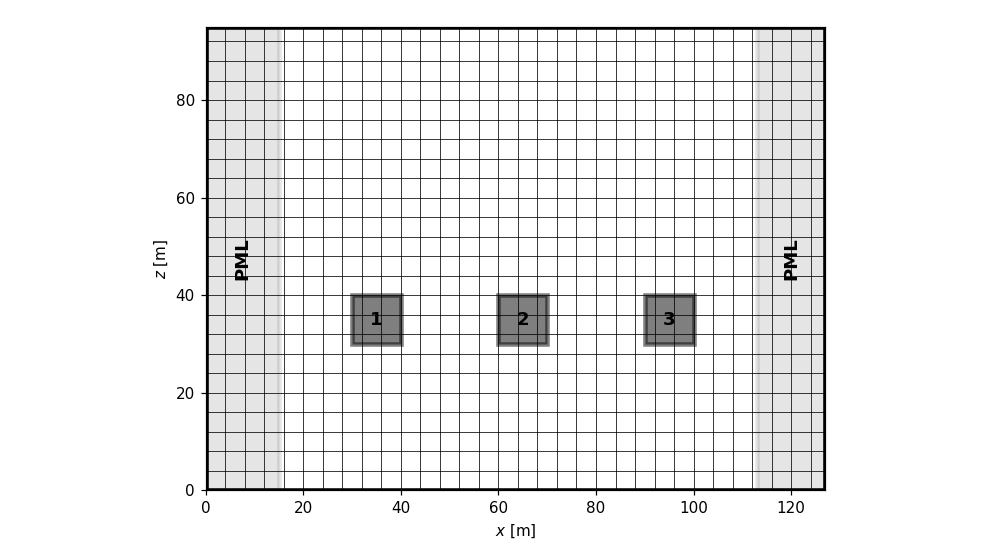

In [10]:
%matplotlib notebook
from fdgrid import mesh, templates, Obstacle, Domain

def custom_obstacles(nx, nz):

    geo = [Obstacle([30, 30, 40, 40], 'RRRR'),
           Obstacle([60, 30, 70, 40], 'RRRR'),
           Obstacle([90, 30, 100, 40], 'RRRR')]

    return Domain((nx, nz), data=geo)


nx, nz = 128, 96
dx, dz = 1., 1.
ix0, iz0 = 0, 0
bc = 'ARAR'

mesh1 = mesh.Mesh((nx, nz), (dx, dz), (ix0, iz0), obstacles=custom_obstacles(nx, nz), bc=bc)
mesh1.plot_grid(pml=True, legend=True, filename='regular.png')

## Mesh object with moving boundary

<IPython.core.display.Javascript object>


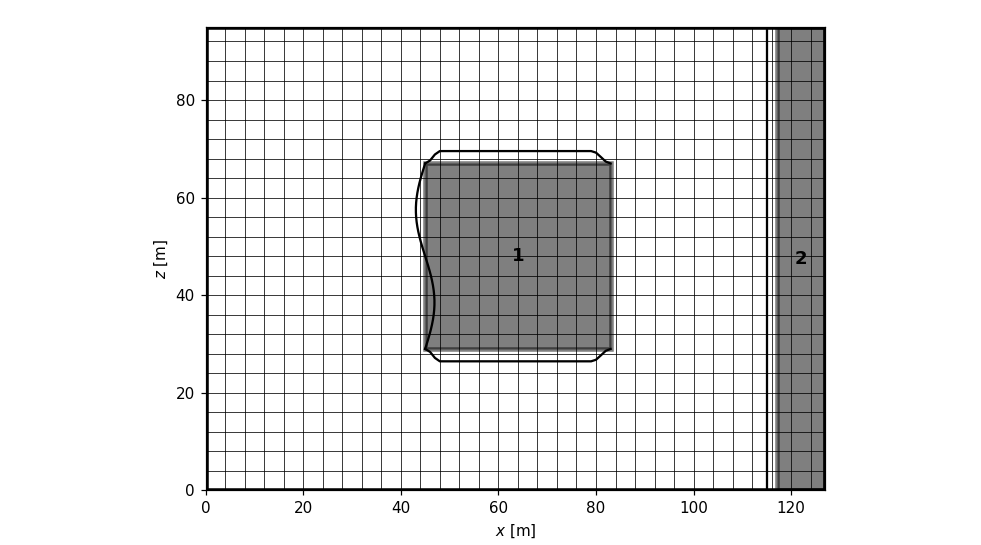

1 U 70000 45 slice(29, 68, None)
0 V 30000 slice(45, 84, None) 29
0 V 30000 slice(45, 84, None) 67
1 U 73000 117 slice(0, 96, None)


In [9]:
%matplotlib notebook
from fdgrid import mesh, templates, Obstacle, Domain

def custom_obstacles(nx, nz, size_percent=20):

    size = int(min(nx, nz)*size_percent/100)
    
    obs1 = Obstacle([int(nx/2)-size, int(nz/2)-size, int(nx/2)+size, int(nz/2)+size], 'UVRV')
    obs2 = Obstacle([nx-11, 0, nx-1, nz-1], 'URRR')

    obs1.set_moving_bc({'f': 70000, 'A': 1, 'func': 'sine'},
                       {'f': 30000, 'A': -1, 'func': 'tukey'},
                       {'f': 30000, 'A': 1, 'func': 'tukey'})
    obs2.set_moving_bc({'f': 73000, 'A': -1, 'func': 'flat'})

    return Domain((nx, nz), data=[obs1, obs2])


nx, nz = 128, 96
dx, dz = 1., 1.
ix0, iz0 = 0, 0
bc = 'RRRR'

mesh2 = mesh.Mesh((nx, nz), (dx, dz), (ix0, iz0), obstacles=custom_obstacles(nx, nz), bc=bc)
mesh2.plot_grid(pml=True, legend=True, bc_profiles=True,  filename='moving_bc.png')

## AdaptativeMesh object

<IPython.core.display.Javascript object>


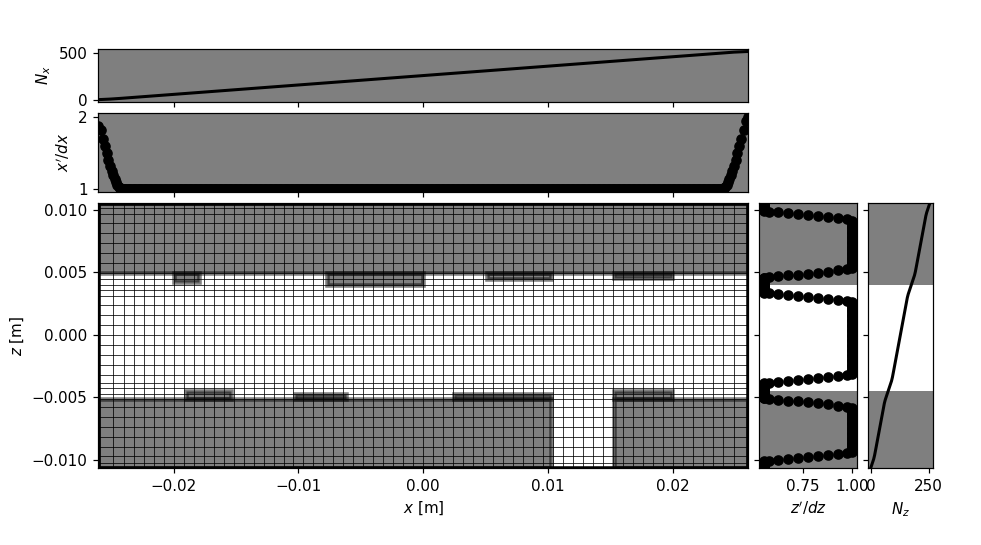

Adaptative cartesian 512x256 points grid with ARAR boundary conditions:

	* Spatial step  : (0.0001, 0.0001)
	* Origin        : (256, 128)
	* Points in PML : 15
	* Max stencil   : 11
	* Dilatation over 10 pts  : 45.0 %



In [7]:
from fdgrid import mesh, templates, domains


shape = (512, 256)
steps = (1e-4, 1e-4)
origin = (256, 128)
bc = 'ARAR'
obstacles = templates.street(*shape)

mesh3 = mesh.AdaptativeMesh(shape, steps, origin, obstacles=obstacles, bc=bc, dilatation=50, Nd=10)
mesh3.plot_grid(N=8, axis=True, filename='adaptative.png')
print(mesh3)

## CurvilinearMesh object

<IPython.core.display.Javascript object>


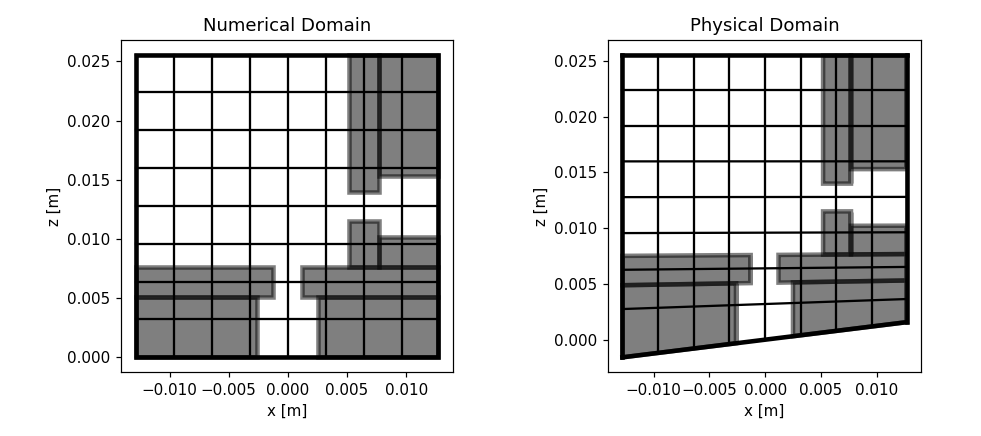

In [2]:
%matplotlib notebook
from fdgrid import mesh, templates
import numpy as np

nx, nz = 256, 256
dx = 1e-4
dz = dx

ix0, iz0 = 128, 0
obstacles = templates.helmholtz_double(nx, nz)
bc = 'RRRR'

def curv(xn, zn):
    f = 5*dx
    xp = xn.copy()
    zp = zn + np.exp(-np.linspace(0, 10, zn.shape[1]))*np.sin(2*np.pi*f*xn/xn.max()/2)
    
    return xp, zp

mesh4 = mesh.CurvilinearMesh((nx, nz), (dx, dz), (ix0, iz0), obstacles=obstacles, bc=bc, fcurvxz=curv)
mesh4.plot_physical(filename='curvilinear.png')

## Working with subdomains for nsfds2

<IPython.core.display.Javascript object>


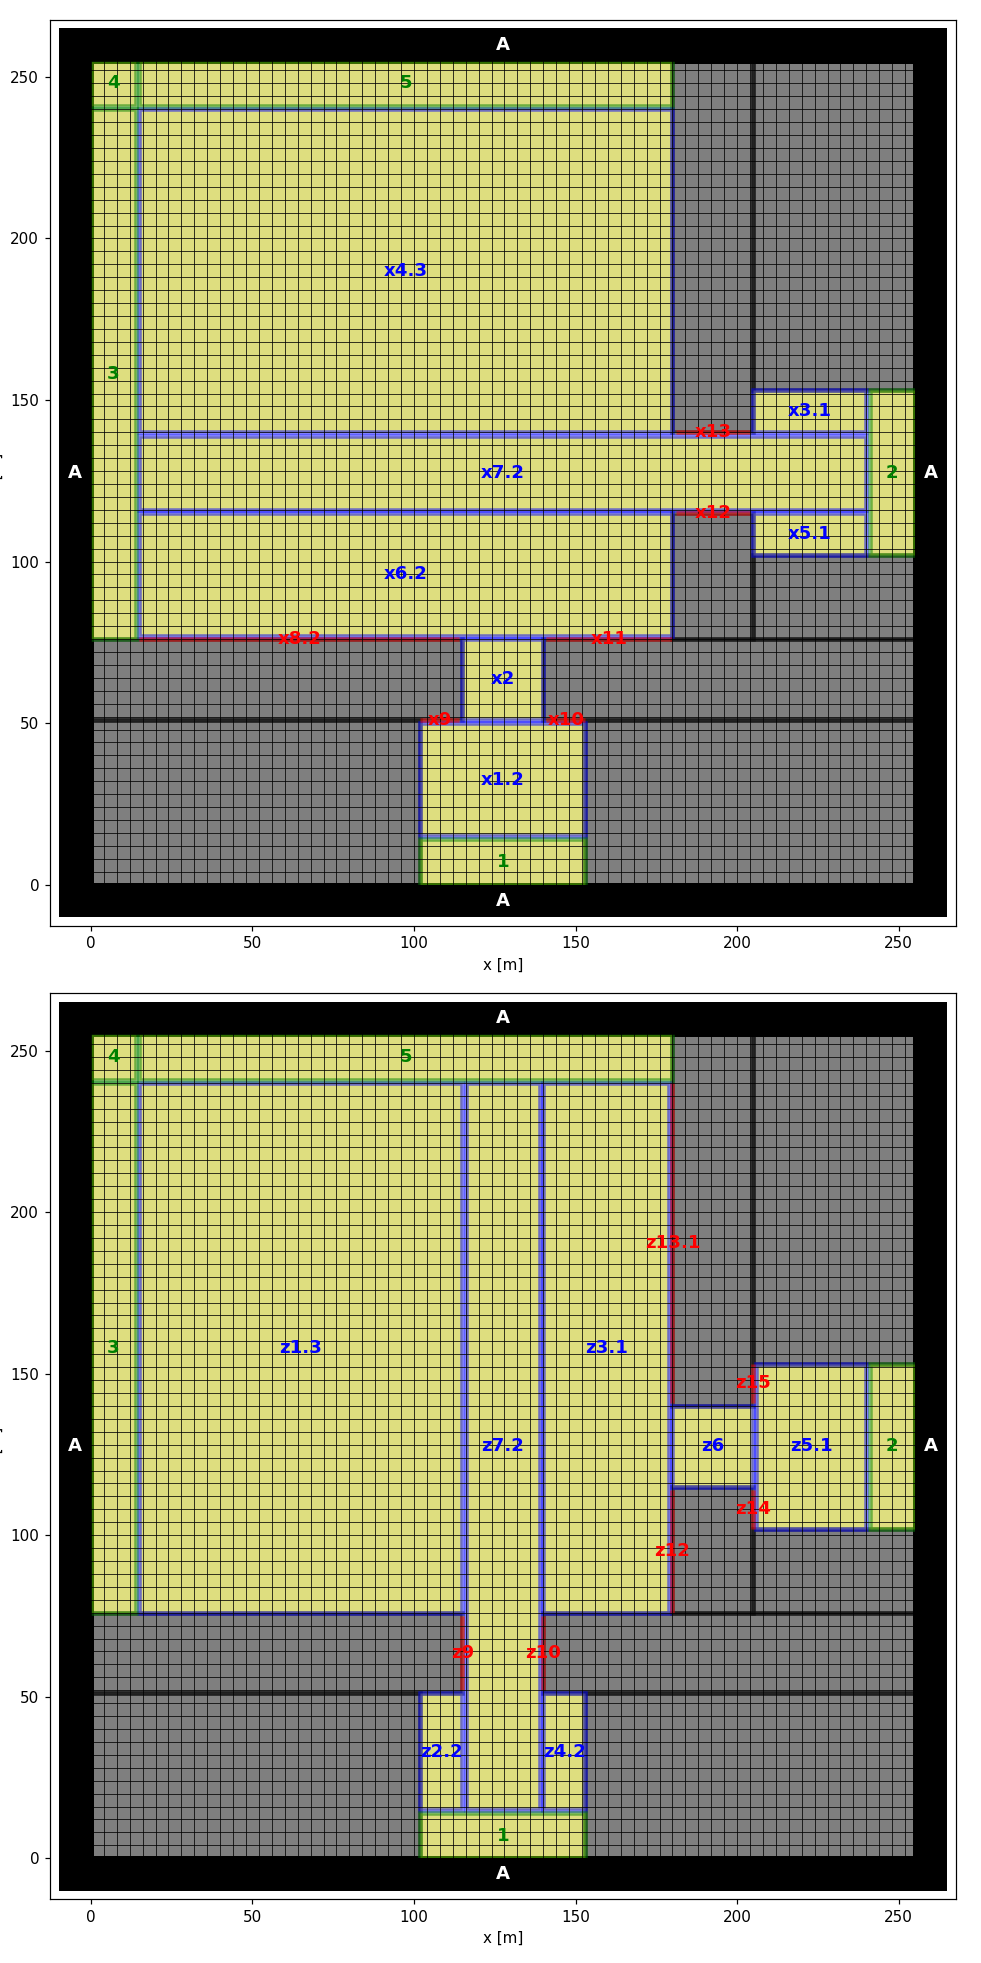

*** x-domains ***
	Subdomain(xz=[102, 15, 153, 50], bc='R.R.', key='x1.2', axis=0, tag='X')
	Subdomain(xz=(115, 51, 140, 76), bc='R.R.', key='x2', axis=0, tag='X')
	Subdomain(xz=[205, 140, 240, 153], bc='R.X.', key='x3.1', axis=0, tag='X')
	Subdomain(xz=[15, 140, 180, 240], bc='X.R.', key='x4.3', axis=0, tag='X')
	Subdomain(xz=[205, 102, 240, 115], bc='R.X.', key='x5.1', axis=0, tag='X')
	Subdomain(xz=[15, 77, 180, 115], bc='X.R.', key='x6.2', axis=0, tag='X')
	Subdomain(xz=[15, 116, 240, 139], bc='X.X.', key='x7.2', axis=0, tag='X')
	Subdomain(xz=[15, 76, 114, 76], bc='X.X.', key='x8.2', axis=0, tag='W')
	Subdomain(xz=(102, 51, 114, 51), bc='R.X.', key='x9', axis=0, tag='W')
	Subdomain(xz=(141, 51, 153, 51), bc='X.R.', key='x10', axis=0, tag='W')
	Subdomain(xz=(141, 76, 180, 76), bc='X.R.', key='x11', axis=0, tag='W')
	Subdomain(xz=(181, 115, 204, 115), bc='X.X.', key='x12', axis=0, tag='W')
	Subdomain(xz=(181, 140, 204, 140), bc='X.X.', key='x13', axis=0, tag='W')

*** z-domains ***


In [6]:
%matplotlib notebook
from fdgrid import mesh, templates

nx, nz = 256, 256
dx, dz = 1., 1.
ix0, iz0 = 0, 0
obstacles = templates.helmholtz_double(nx, nz)
bc = 'AAAA'

mesh5 = mesh.Mesh((nx, nz), (dx, dz), (ix0, iz0), obstacles=obstacles, bc=bc)
mesh5.plot_domains(legend=True, filename='domains.png')